Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0051 - val_loss: 0.0062
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0060
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - val_loss: 0.0056
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - val_loss: 0.005

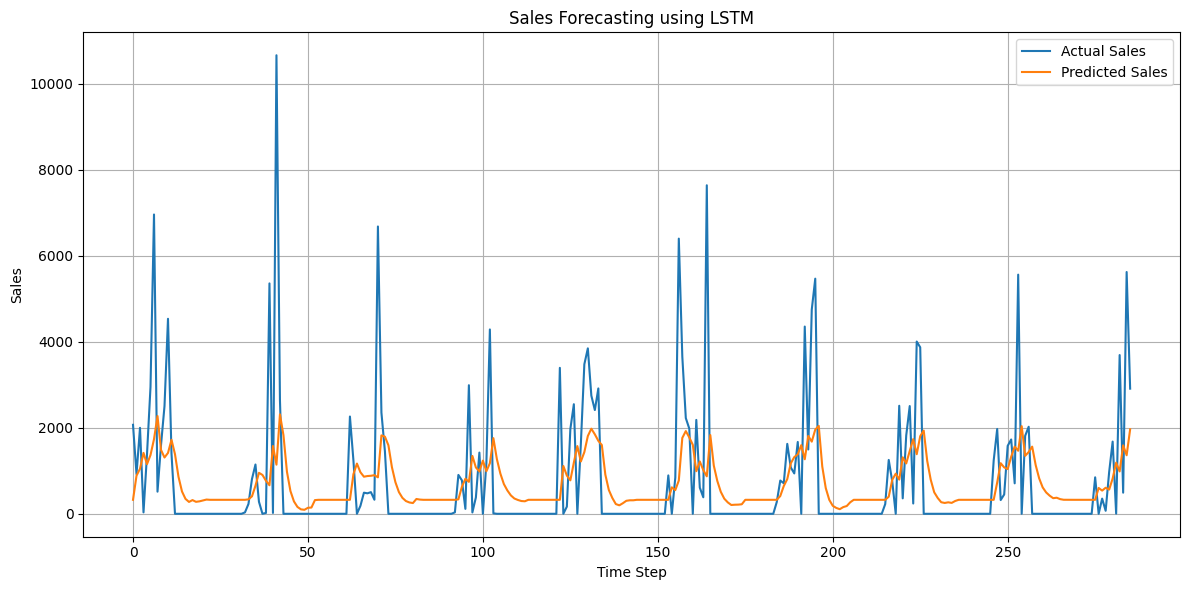

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('cleaned_sales_data.csv', parse_dates=['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample daily sales
df_daily = df['Sales'].resample('D').sum().to_frame()

# Drop missing values
df_daily.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_daily)

# Convert to supervised learning format
X, y = [], []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Split into training and testing sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict
pred = model.predict(X_test)

# Inverse scale the results
pred_inv = scaler.inverse_transform(pred)
actual_inv = scaler.inverse_transform(y_test)

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))
plt.plot(actual_inv, label='Actual Sales')
plt.plot(pred_inv, label='Predicted Sales')
plt.title('Sales Forecasting using LSTM')
plt.xlabel('Time Step')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





